In [2]:
from lpm_circ import *
from diff_circ import *
import matplotlib.pyplot as plt
import numpy as np

In [3]:
basic_circ_model = LPModel() # Define the model

# Add all the units in the numbering system indicated
# Links are [list_back, list_forward]
# Units are formulated w/ mmHg, mL, and s
# Diodes are located between the chambers of the heart

basic_circ_model.add_unit(LPunit(0, 0.03, C=1, links=[[24],[1]], ics=[53,0], D_out=True)) # Right atrium
basic_circ_model.units[0].assign_nonlinear("C", pvt_ra) # Add the right atrium PV time relationship
basic_circ_model.add_unit(LPunit(1, 0.01, C=1, links=[[0],[2,5]], ics=[110,0], D_out=True)) # Right ventricle
basic_circ_model.units[1].assign_nonlinear("C", pvt_rv) # Add the right ventricle PV time relationship
basic_circ_model.add_unit(LPunit(2, 0.05, C=1.5, L = 0.001, links=[[1],[3]], ics=[64,0,0])) # R. proximal artery
basic_circ_model.add_unit(LPunit(3, 0.06, C=9, links=[[2],[4]], ics=[140,0], diffusive_region=True)) # R. distal artery
basic_circ_model.units[3].assign_diffusion_input(cig_diffusion)
basic_circ_model.add_unit(LPunit(4, 0.07, C=15, links=[[3],[8]], ics=[130,0])) # R. pulmonary vein
basic_circ_model.add_unit(LPunit(5, 0.05, C=1.5, L = 0.001, links=[[1],[6]], ics=[64,0,0])) # L. proximal artery
basic_circ_model.add_unit(LPunit(6, 0.06, C=9, links=[[5],[7]], ics=[140,0], diffusive_region=True)) # L. distal artery
basic_circ_model.units[6].assign_diffusion_input(cig_diffusion)
basic_circ_model.add_unit(LPunit(7, 0.07, C=15, links=[[6],[8]], ics=[130,0])) # L. pulmonary vein
basic_circ_model.add_unit(LPunit(8, 0.02, C=1, links=[[4,7],[9]], ics=[63,0], D_out=True)) # Left atrium
basic_circ_model.units[8].assign_nonlinear("C", pvt_la)
basic_circ_model.add_unit(LPunit(9, 0.02, C=1, links=[[8],[10,15,18,21]], ics=[123,0], D_out=True)) # Left ventricle
basic_circ_model.units[9].assign_nonlinear("C", pvt_lv)
basic_circ_model.add_unit(LPunit(10, 8, C=0.7, links=[[9],[11,13]], ics=[111,0])) # Brachiocephalic artery
basic_circ_model.add_unit(LPunit(11, 0.5, C=3, links=[[10],[12]], ics=[29,0])) # R. subclavian artery
basic_circ_model.add_unit(LPunit(12, 0.27, C=9, links=[[11],[24]], ics=[66,0])) # R. subclavian vein
basic_circ_model.add_unit(LPunit(13, 0.5, C=2, links=[[10],[14]], ics=[20,0])) # R. internal carotid artery
basic_circ_model.add_unit(LPunit(14, 0.25, C=9, links=[[13],[24]], ics=[69,0])) # R. jugular vein
basic_circ_model.add_unit(LPunit(15, 12, C=0.7, links=[[9],[16]], ics=[117,0])) # L. common carotid artery
basic_circ_model.add_unit(LPunit(16, 0.5, C=3, links=[[15],[17]], ics=[37,0])) # L. internal carotid artery
basic_circ_model.add_unit(LPunit(17, 0.25, C=9, links=[[16],[24]], ics=[66,0])) # L. jugular vein
basic_circ_model.add_unit(LPunit(18, 12, C=0.7, links=[[9],[19]], ics=[117,0])) # L. subclavian artery
basic_circ_model.add_unit(LPunit(19, 0.5, C=2, links=[[18],[20]], ics=[19,0])) # L. upper arm artery
basic_circ_model.add_unit(LPunit(20, 0.25, C=9, links=[[19],[24]], ics=[66,0])) # L. subclavian vein
basic_circ_model.add_unit(LPunit(21, 1.2, C=0.8, L=0.001, links=[[9],[22]], ics=[64,0,0])) # Desc. aorta
basic_circ_model.add_unit(LPunit(22, 1, C=1, links=[[21],[23]], ics=[217,0])) # Systemic arteries
basic_circ_model.units[22].assign_nonlinear("C", pv_proxart)
basic_circ_model.units[22].assign_nonlinear("R", rv_proxart)
basic_circ_model.add_unit(LPunit(23, 0.2, C=1, links=[[22],[24]], ics=[2526,0])) # Systemic veins
basic_circ_model.units[23].assign_nonlinear("C", pv_sysv)
basic_circ_model.add_unit(LPunit(24, 1, C=1, links=[[12,14,17,20,23],[0]], ics=[170,0])) # Vena cava
basic_circ_model.units[24].assign_nonlinear("C", pv_vena)
basic_circ_model.units[24].assign_nonlinear("R", rv_vena)

basic_circ_model.solute_settings(kD=0.0000962704417444) # Half life of nicotine in the body is 2 hours

In [4]:
dt = .01
T = 3000
total_test = basic_circ_model.solve_model(dt, T)

0.0
5.053146155061154e-07
5.053146155061154e-07
6.896187821379498e-09
6.896187821379498e-09
8.056244499492697e-10
8.056244499492697e-10
0.0
8.056244499492697e-11
8.056244499492697e-11
1.6112488998985393e-10
2.416873349847809e-10
3.2224977997970786e-10
4.0281222497463483e-10
5.639371149644888e-10
7.250620049543427e-10
8.861868949441967e-10
2.497435794842736e-09
4.1086846947412755e-09
5.719933594639815e-09
2.183242259362521e-08
3.79449115926106e-08
5.4057400591595995e-08
2.1518229058144992e-07
3.763071805713038e-07
5.374320705611577e-07
2.148680970459697e-06
3.7599298703582364e-06
5.371178770256776e-06
6.982427670155315e-06
2.3094916669140706e-05
3.92074056681261e-05
5.531989466711149e-05
7.143238366609687e-05
0.00023255727365595078
0.00023255727365595078
0.0003936821636458047
0.0003936821636458047
0.0005548070536356587
0.0005548070536356587
0.0007159319436255125
0.0007159319436255125
0.0008770568336153664
0.0008770568336153664
0.0024883057335139055
0.0024883057335139055
0.00409955463341

In [6]:
pressures = basic_circ_model.get_pressures()

In [9]:
concentrations = basic_circ_model.get_conc()

[None, None]

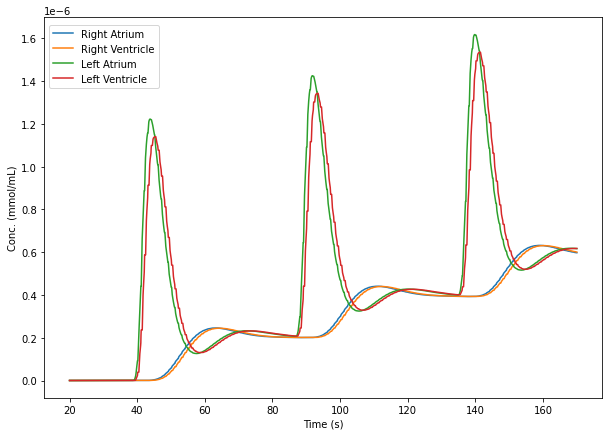

In [45]:
fig, ax = plt.subplots(1,1)
ax.plot(np.linspace(0, T, int(T/dt)+1)[int(20/dt):int(170/dt)], concentrations[0][int(20/dt):int(170/dt)], label="Right Atrium")
ax.plot(np.linspace(0, T, int(T/dt)+1)[int(20/dt):int(170/dt)], concentrations[1][int(20/dt):int(170/dt)], label="Right Ventricle")
ax.plot(np.linspace(0, T, int(T/dt)+1)[int(20/dt):int(170/dt)], concentrations[8][int(20/dt):int(170/dt)], label="Left Atrium")
ax.plot(np.linspace(0, T, int(T/dt)+1)[int(20/dt):int(170/dt)], concentrations[9][int(20/dt):int(170/dt)], label="Left Ventricle")
ax.set(xlabel="Time (s)", ylabel="Conc. (mmol/mL)")#, title="Concentration of solute in heart chambers over time")
fig.legend(loc="upper left", bbox_to_anchor=(.125, .875))
fig.set(figheight=7, figwidth=10)

[None, None]

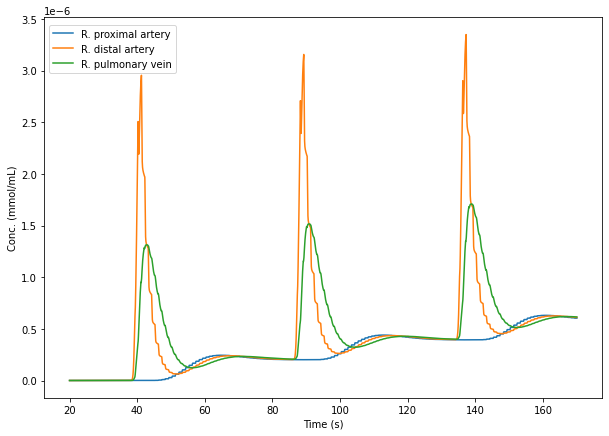

In [46]:
fig, ax = plt.subplots(1,1)
ax.plot(np.linspace(0, T, int(T/dt)+1)[int(20/dt):int(170/dt)], concentrations[2][int(20/dt):int(170/dt)], label="R. proximal artery")
ax.plot(np.linspace(0, T, int(T/dt)+1)[int(20/dt):int(170/dt)], concentrations[3][int(20/dt):int(170/dt)], label="R. distal artery")
ax.plot(np.linspace(0, T, int(T/dt)+1)[int(20/dt):int(170/dt)], concentrations[4][int(20/dt):int(170/dt)], label="R. pulmonary vein")
ax.set(xlabel="Time (s)", ylabel="Conc. (mmol/mL)")#, title="Concentration of solute in vessels near diffusion site")
fig.legend(loc="upper left", bbox_to_anchor=(.125, .875))
fig.set(figheight=7, figwidth=10)

[None, None]

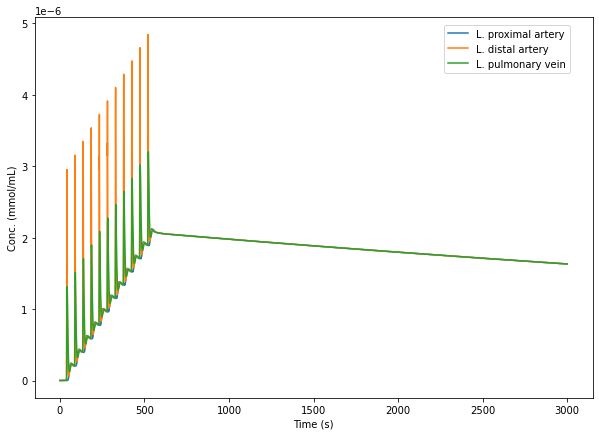

In [47]:
fig, ax = plt.subplots(1,1)
ax.plot(np.linspace(0, T, int(T/dt)+1), concentrations[2], label="L. proximal artery")
ax.plot(np.linspace(0, T, int(T/dt)+1), concentrations[3], label="L. distal artery")
ax.plot(np.linspace(0, T, int(T/dt)+1), concentrations[4], label="L. pulmonary vein")
ax.set(xlabel="Time (s)", ylabel="Conc. (mmol/mL)")#, title="Concentration of solute in vessels near diffusion site")
fig.legend(loc="upper right", bbox_to_anchor=(.875, .875))
fig.set(figheight=7, figwidth=10)

[None, None]

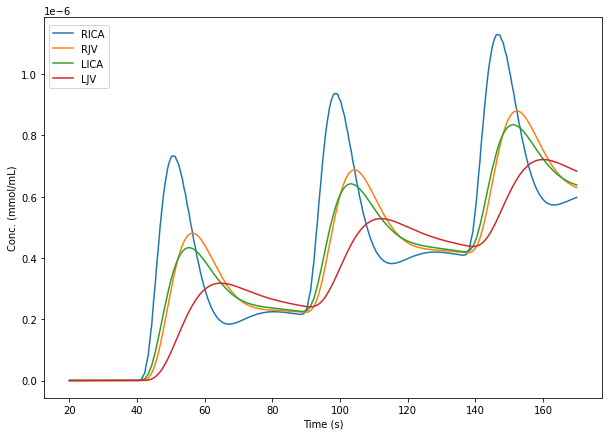

In [48]:
fig, ax = plt.subplots(1,1)
ax.plot(np.linspace(0, T, int(T/dt)+1)[int(20/dt):int(170/dt)], concentrations[13][int(20/dt):int(170/dt)], label="RICA")
ax.plot(np.linspace(0, T, int(T/dt)+1)[int(20/dt):int(170/dt)], concentrations[14][int(20/dt):int(170/dt)], label="RJV")
ax.plot(np.linspace(0, T, int(T/dt)+1)[int(20/dt):int(170/dt)], concentrations[16][int(20/dt):int(170/dt)], label="LICA")
ax.plot(np.linspace(0, T, int(T/dt)+1)[int(20/dt):int(170/dt)], concentrations[17][int(20/dt):int(170/dt)], label="LJV")
ax.set(xlabel="Time (s)", ylabel="Conc. (mmol/mL)")#, title="Concentration of solute in cephalic circulation")
fig.legend(loc="upper left", bbox_to_anchor=(.125, .875))
fig.set(figheight=7, figwidth=10)